# Model Comparison Notebook

This notebook aims to compare the performance of the top 3 models from three different approaches: Random Forest (RF), XGBoost, and LSTM. The evaluation will be performed using the test dataset spanning from **2024-11-22** to **2025-01-25**. 

### Objectives:
1. **Model Evaluation**: Assess the performance of the 3 best models from each category (RF, XGBoost, and LSTM) on the unseen test data.
2. **Performance Metrics**:
   - **Mean Squared Error (MSE)**: To measure the average squared difference between the predicted and actual values.
   - **Mean Absolute Error (MAE)**: To assess the average absolute differences between predicted and actual values.
   - **R² Score**: To evaluate how well the predictions explain the variability in the target data.
3. **Visualization**: Use visual plots to compare model performance and identify the most suitable models for deployment.

### Additional Notes:
- **Dataset**: The test dataset will include daily Open, High, Low, and Close values, ensuring consistency across all models.
- **Model Inputs**: Each model will use its optimal feature set determined during the respective feature selection phase.
- **Analysis**: Post evaluation, we will determine which models perform best for potential use in live deployment.

By the end of this notebook, we will have a clear understanding of which models are the most accurate and robust based on the selected metrics.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
from tensorflow.keras.models import load_model

2025-01-25 18:49:37.767900: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 18:49:37.770635: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 18:49:37.777801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737823777.790338  217298 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737823777.793874  217298 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 18:49:37.808076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

---
# Load, Format and Scale the test data

In [2]:
#read data
data = pd.read_csv("../data/raw/eur_usd_data.csv", parse_dates=["date"], index_col="date")

#format data
cutoff_date = "2024-11-22"
train_data = data[data.index < cutoff_date]
test_data = data[data.index > cutoff_date]
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

#scale data
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train_data)
scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)

scaled_test = scaler.transform(test_data)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

print("Testing Data (Scaled):")
scaled_test.head()

Training Data Shape: (2607, 4)
Test Data Shape: (44, 4)
Testing Data (Scaled):


,Open,High,Low,Close
date,,,,
2024-11-25,-1.443313,-1.327902,-1.401986,-1.443451
2024-11-26,-1.354975,-1.252852,-1.311513,-1.355127
2024-11-27,-1.220678,-1.287447,-1.210717,-1.220851
2024-11-28,-1.219736,-1.230167,-1.184814,-1.219909
2024-12-01,-1.252321,-1.324310,-1.336478,-1.253619


---
# Load Trained Models

In [3]:
models_dir = "../models/EURUSD_daily/"
models = {}


def load_model_with_error_handling(file_path, loader, model_name):
    try:
        model = loader(file_path)
        print(f"Successfully loaded: {model_name}")
        return model
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        return None


# Load Random Forest models
rf_model_files = [
    ("rf_138", f"{models_dir}rf_model_full_138.joblib"),
    ("rf_219", f"{models_dir}rf_model_full_219.joblib"),
    ("rf_300", f"{models_dir}rf_model_full_300.joblib")
]
for name, path in rf_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, joblib.load, name)
    else:
        print(f"File not found: {path}")


# Load XGBoost models
xgb_model_files = [
    ("xgb_277", f"{models_dir}xgb_model_full_277.joblib"),
    ("xgb_281", f"{models_dir}xgb_model_full_281.joblib"),
    ("xgb_283", f"{models_dir}xgb_model_full_283.joblib")
]
for name, path in xgb_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, joblib.load, name)
    else:
        print(f"File not found: {path}")
        

# Load LSTM models
lstm_model_files = [
    ("lstm_1", f"{models_dir}lstm_model_full_1.keras"),
    ("lstm_2", f"{models_dir}lstm_model_full_2.keras"),
    ("lstm_3", f"{models_dir}lstm_model_full_3.keras")
]
for name, path in lstm_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, load_model, name)
    else:
        print(f"File not found: {path}")
        

print("\nModel Loading Summary:")
for name, model in models.items():
    if model is not None:
        print(f"{name}: Successfully loaded")
    else:
        print(f"{name}: Failed to load")

Successfully loaded: rf_138
Successfully loaded: rf_219
Successfully loaded: rf_300
Successfully loaded: xgb_277
Successfully loaded: xgb_281
Successfully loaded: xgb_283
Successfully loaded: lstm_1


2025-01-25 18:49:39.334512: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Successfully loaded: lstm_2
Successfully loaded: lstm_3

Model Loading Summary:
rf_138: Successfully loaded
rf_219: Successfully loaded
rf_300: Successfully loaded
xgb_277: Successfully loaded
xgb_281: Successfully loaded
xgb_283: Successfully loaded
lstm_1: Successfully loaded
lstm_2: Successfully loaded
lstm_3: Successfully loaded


---
# Individual Model Testing and Evaluation

In [4]:
# Set up structure
results = {
    "model_name": [],
    "mse": [],
    "mae": [],
    "r2": [],
}

X_test = scaled_test.drop(columns=["Close"])
y_true = scaled_test["Close"]
print(f"X_test shape: {X_test.shape}")
print(f"y_true shape: {y_true.shape}")

X_test shape: (44, 3)
y_true shape: (44,)


In [5]:
#metric and result tracking function
def metric_calculation(predictions, model_name):
    # Calculate metrics
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    
    print(f"Mean Squared Error (MSE): {mse:.6f}")
    print(f"R² Score: {r2:.6f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    
    #save metrics
    results["model_name"].append(model_name)
    results["mse"].append(mse)
    results["mae"].append(mae)
    results["r2"].append(r2)

In [6]:
#basic result of fit plots
def result_plot(predictions, color, axes):
    # Plot 1: Actual vs. Predicted Scatter Plot
    axes[0].scatter(y_true, predictions, alpha=0.7, color=color)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
    axes[0].set_title("Actual vs Predicted (Scatter)")
    axes[0].set_xlabel("True Values")
    axes[0].set_ylabel("Predicted Values")
    
    # Plot 2: Residuals Plot
    residuals = y_true - predictions
    axes[1].scatter(predictions, residuals, alpha=0.7, color=color)
    axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[1].set_title("Residuals Plot")
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Residuals")
    
    # Plot 3: Actual vs. Predicted Line Plot
    axes[2].plot(range(len(y_true)), y_true, label='True Values', linestyle='-', color='black')
    axes[2].plot(range(len(predictions)), predictions, label='Predicted Values', linestyle='--', color=color)
    axes[2].set_title("Actual vs Predicted (Line Plot)")
    axes[2].set_xlabel("Index")
    axes[2].set_ylabel("Values")
    axes[2].legend()

## 1. Random forrest models:
---
#### Model 1 - rf_138

In [7]:
# Predict on the test set
model = models["rf_138"]
y_test_pred_rf1 = model.predict(X_test)

In [8]:
# Calculate metrics
metric_calculation(y_test_pred_rf1, "rf_138")

Mean Squared Error (MSE): 0.000545
R² Score: 0.983302
Mean Absolute Error (MAE): 0.008133


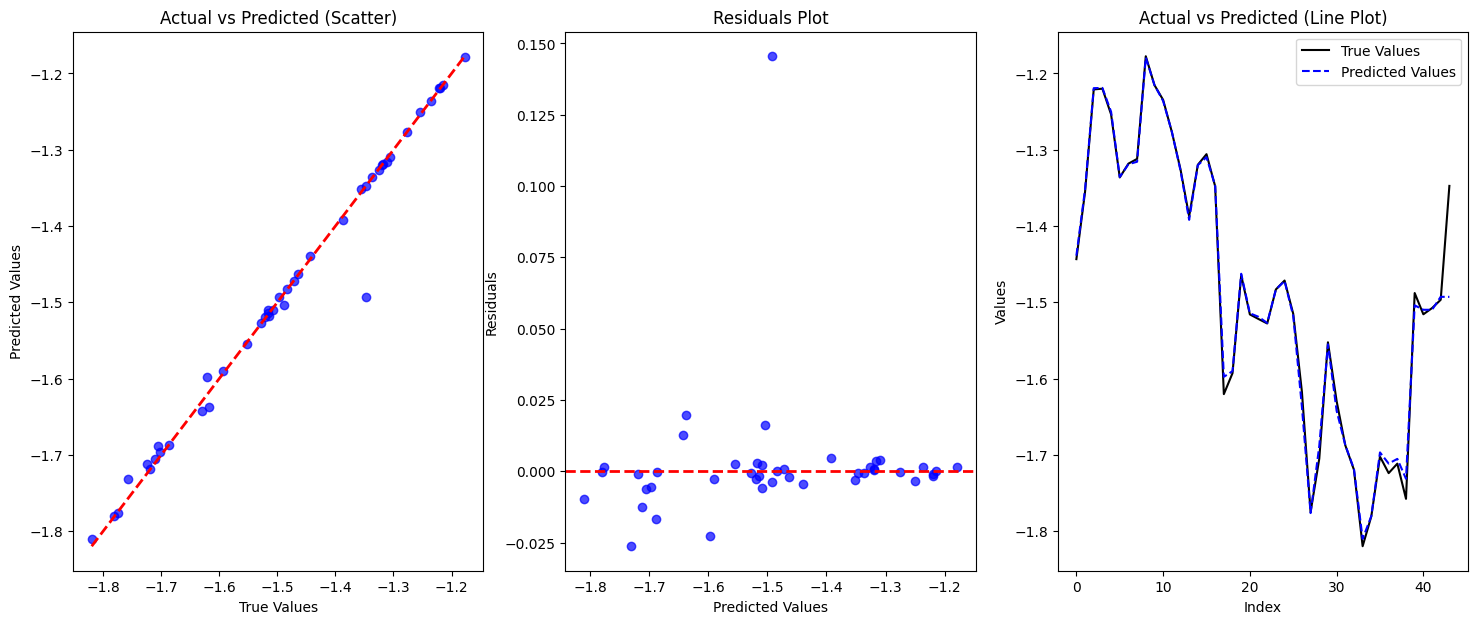

In [9]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_rf1, "blue", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted**:
   - The points are generally aligned along the red dashed line, indicating a good correlation between the model predictions and the true values.
   - There are a few points that deviate significantly from the line, suggesting some predictions are less accurate, likely caused by outliers or challenging instances in the data.

2. **Residuals Plot**:
   - The residuals are scattered around the zero line, indicating that the model does not exhibit systematic bias.
   - However, a few outliers with large residuals stand out, which could have a noticeable impact on the overall performance metrics.

3. **Actual vs Predicted (Line Plot)**:
   - The model predictions (blue dashed line) closely follow the trend of the true values (black solid line) for most of the data points.
   - Towards the edges, some divergence between the predicted and actual values is evident, likely contributing to the observed residuals.

These plots indicate that while the model captures the general patterns in the data well, the presence of outliers or regions with higher variance in predictions may require further investigation or fine-tuning.

---
#### Model 2 - rf_219

In [10]:
# Predict on the test set
model = models["rf_219"]
y_test_pred_rf2 = model.predict(X_test)

In [11]:
# Calculate metrics
metric_calculation(y_test_pred_rf2, "rf_219")

Mean Squared Error (MSE): 0.000553
R² Score: 0.983058
Mean Absolute Error (MAE): 0.008546


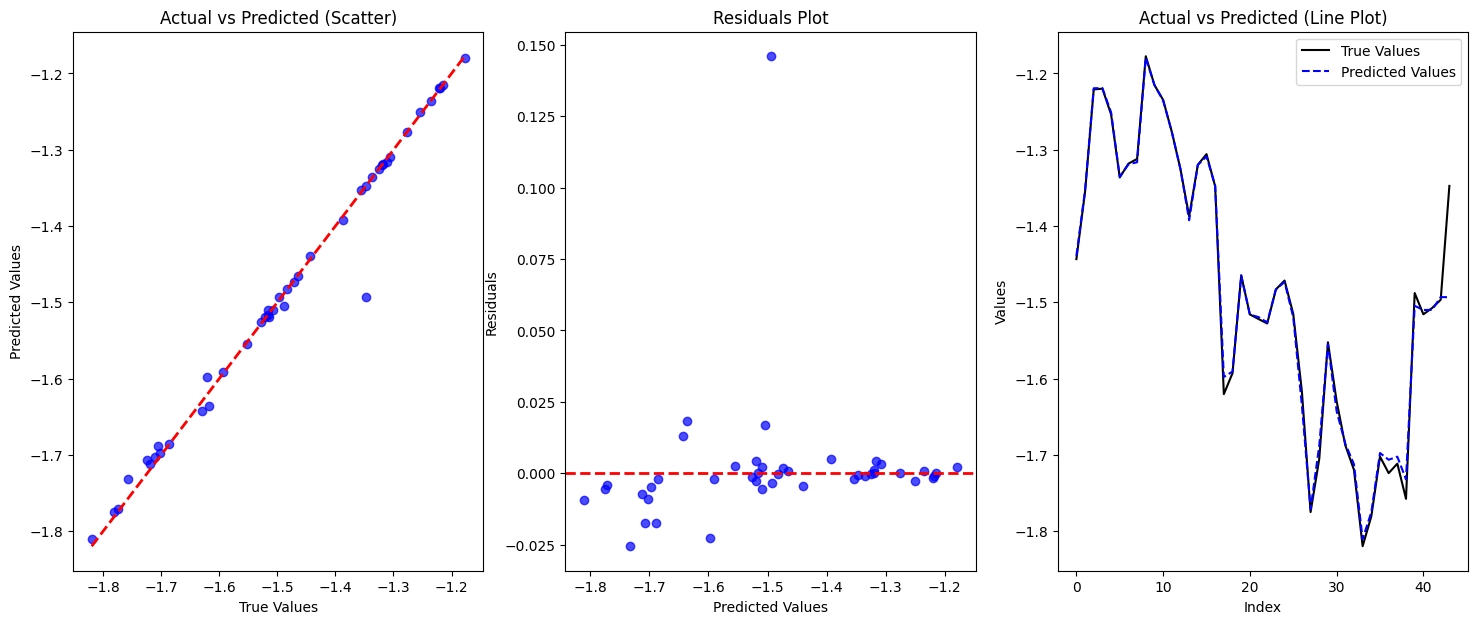

In [12]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_rf2, "blue", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points are mostly aligned along the red dashed line, indicating a strong correlation between the predicted values and the true values.
   - A few deviations from the line are visible, with one significant outlier, suggesting potential challenges in predicting certain data points.

2. **Residuals Plot**:
   - Residuals are scattered randomly around the zero line, indicating no clear systematic bias in the predictions.
   - A noticeable outlier with a large residual is present, which may require further investigation to understand its impact on the model's performance.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (blue dashed line) closely follow the trends of the true values (black solid line) across most of the dataset.
   - There are some minor divergences, particularly in regions where the true values fluctuate rapidly, suggesting areas where the model could improve.

These plots suggest that the model performs well overall, with a strong ability to capture the general trends. However, the presence of an outlier highlights the need for closer examination of the data or the model's handling of such cases.

---
#### Model 3 - rf_300

In [13]:
# Predict on the test set
model = models["rf_300"]
y_test_pred_rf3 = model.predict(X_test)

In [14]:
# Calculate metrics
metric_calculation(y_test_pred_rf3, "rf_300")

Mean Squared Error (MSE): 0.000553
R² Score: 0.983058
Mean Absolute Error (MAE): 0.008546


ERROR! Session/line number was not unique in database. History logging moved to new session 6


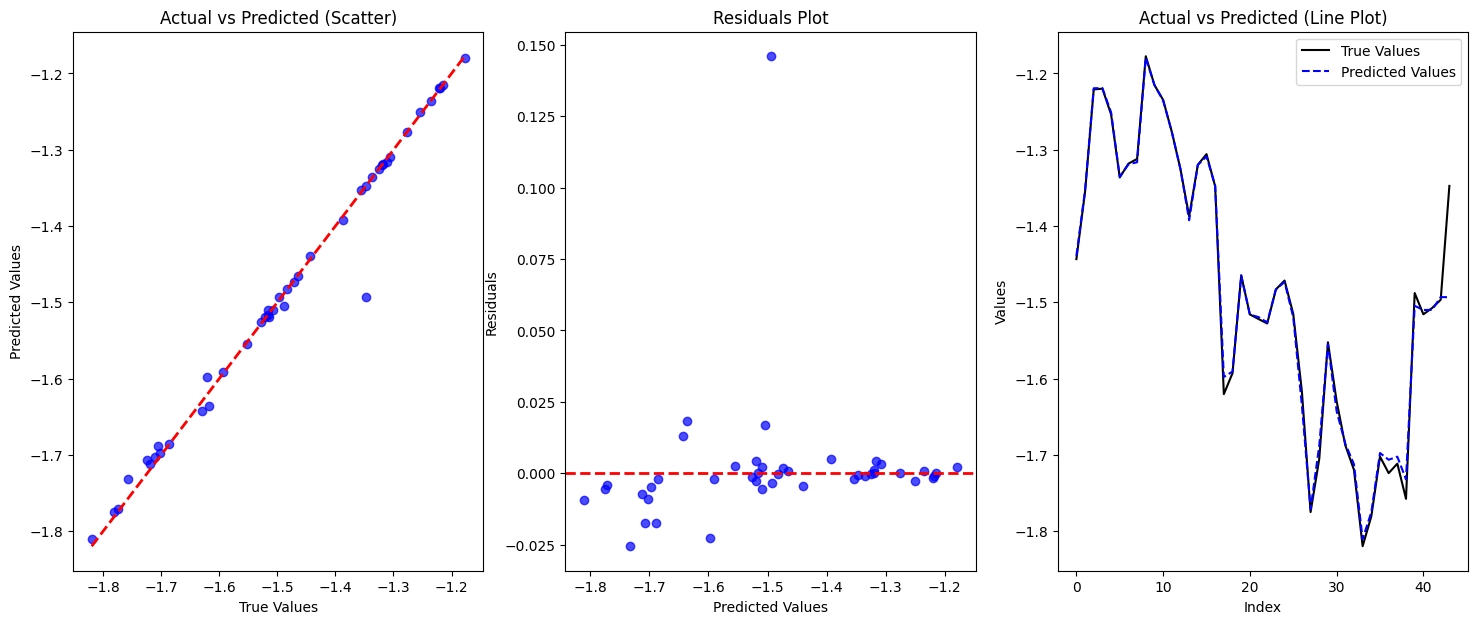

In [15]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_rf3, "blue", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points align closely along the red dashed line, indicating a strong correlation between predicted and true values.
   - However, a few points deviate significantly, with one outlier standing out, which suggests areas where the model may not perform optimally.

2. **Residuals Plot**:
   - The residuals are generally distributed around the zero line, showing no clear systematic bias in predictions.
   - There is a noticeable outlier with a significant residual, indicating potential issues with the model's ability to predict certain data points accurately.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (blue dashed line) closely follow the general trend of the true values (black solid line).
   - Some divergence is noticeable during rapid fluctuations in the true values, showing the model's limitations in capturing abrupt changes.

These observations suggest the model performs well in capturing overall trends, but the outlier and deviations during rapid changes highlight areas for potential improvement.


---
## 2. XGBoost models:
---
#### Model 1 - xgb_277

In [16]:
# Predict on the test set
model = models["xgb_277"]
y_test_pred_xgb1 = model.predict(X_test)

In [17]:
# Calculate metrics
metric_calculation(y_test_pred_xgb1, "xgb_277")

Mean Squared Error (MSE): 0.001751
R² Score: 0.946384
Mean Absolute Error (MAE): 0.026441


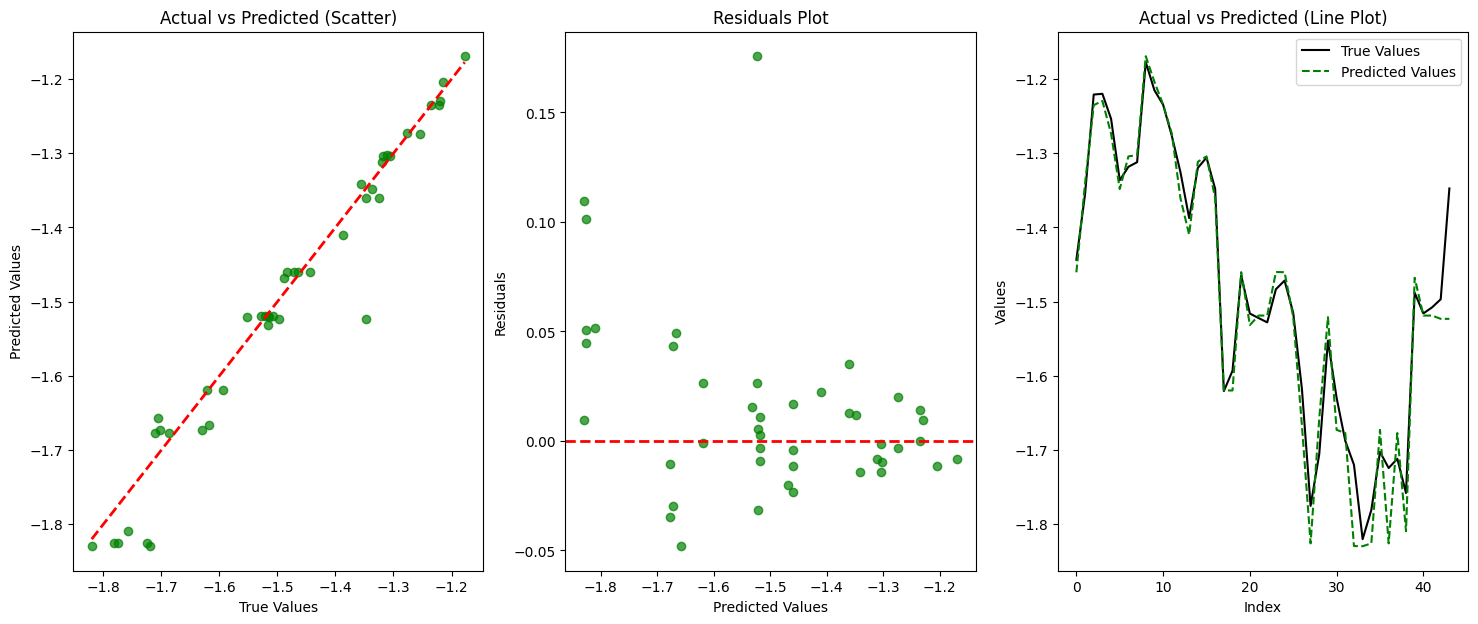

In [18]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_xgb1, "green", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points are closely aligned with the red dashed line, showing a strong correlation between true and predicted values.
   - There are a few noticeable deviations, indicating areas where the model's predictions could be improved.

2. **Residuals Plot**:
   - The residuals are generally distributed around the zero line, suggesting minimal systematic bias in predictions.
   - However, there are some residuals with larger magnitudes, reflecting occasional prediction inaccuracies.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (green dashed line) closely follow the true values (black solid line) across most of the index range.
   - Some discrepancies are visible during rapid fluctuations in the true values, indicating potential challenges in capturing sudden changes.

These plots suggest the model performs well in capturing overall trends, but it could benefit from further optimization to handle areas with large residuals and rapid changes in data.


---
#### Model 2- xgb_281:

xgb_283:

In [19]:
# Predict on the test set
model = models["xgb_281"]
y_test_pred_xgb2 = model.predict(X_test)

In [20]:
# Calculate metrics
metric_calculation(y_test_pred_xgb2, "xgb_281")

Mean Squared Error (MSE): 0.001723
R² Score: 0.947237
Mean Absolute Error (MAE): 0.026744


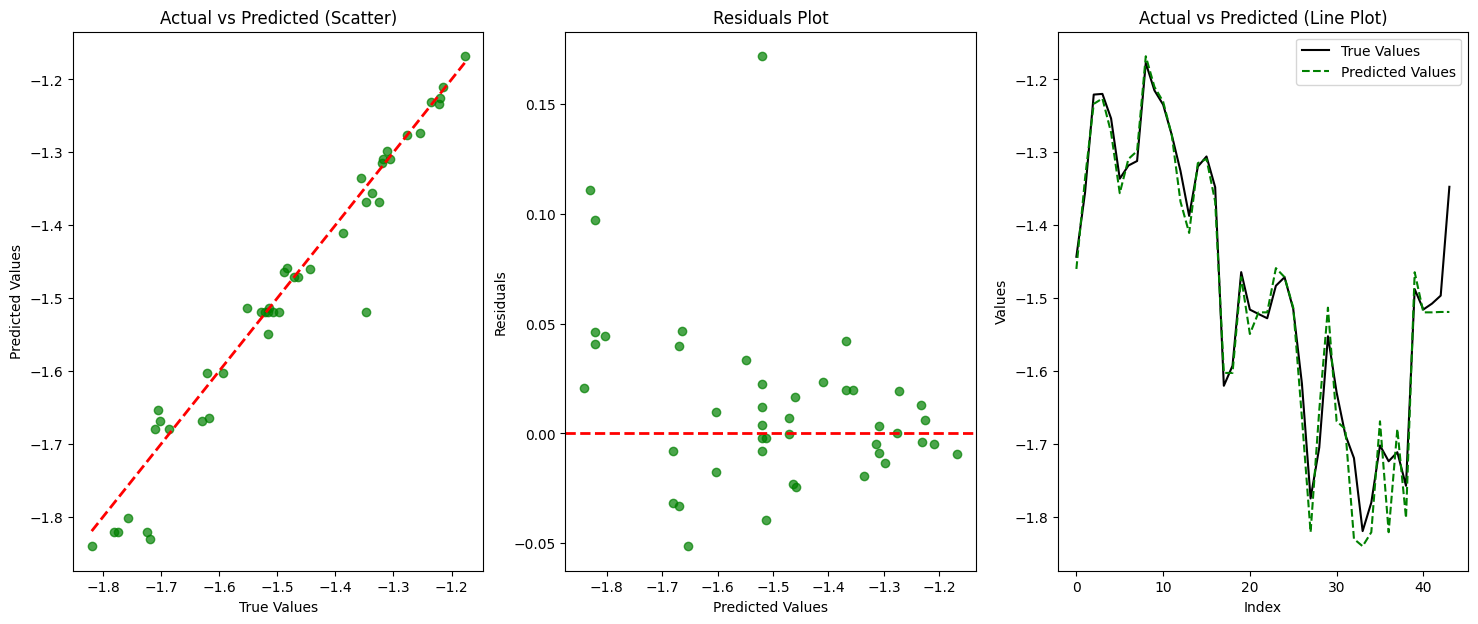

In [21]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_xgb2, "green", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points are fairly aligned along the red dashed line, indicating a decent correlation between the actual and predicted values.
   - However, there are a few notable deviations, particularly in the upper range, suggesting that the model struggles with certain instances.

2. **Residuals Plot**:
   - Residuals are distributed around the zero line, which is a positive indicator that the model has minimal bias.
   - A few larger residuals are visible, implying that certain predictions are less accurate and might require further investigation.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (green dashed line) follow the true values (black solid line) relatively well.
   - Some divergence is noticeable during areas of sharp fluctuations in the true values, indicating potential difficulty in capturing rapid changes.

These observations suggest that while the model performs reasonably well overall, improvements could be made in handling rapid changes and reducing prediction errors for outliers.

---
#### Model 3- xgb_283:

In [22]:
# Predict on the test set
model = models["xgb_283"]
y_test_pred_xgb3 = model.predict(X_test)

In [23]:
# Calculate metrics
metric_calculation(y_test_pred_xgb3, "xgb_283")

Mean Squared Error (MSE): 0.001724
R² Score: 0.947195
Mean Absolute Error (MAE): 0.026180


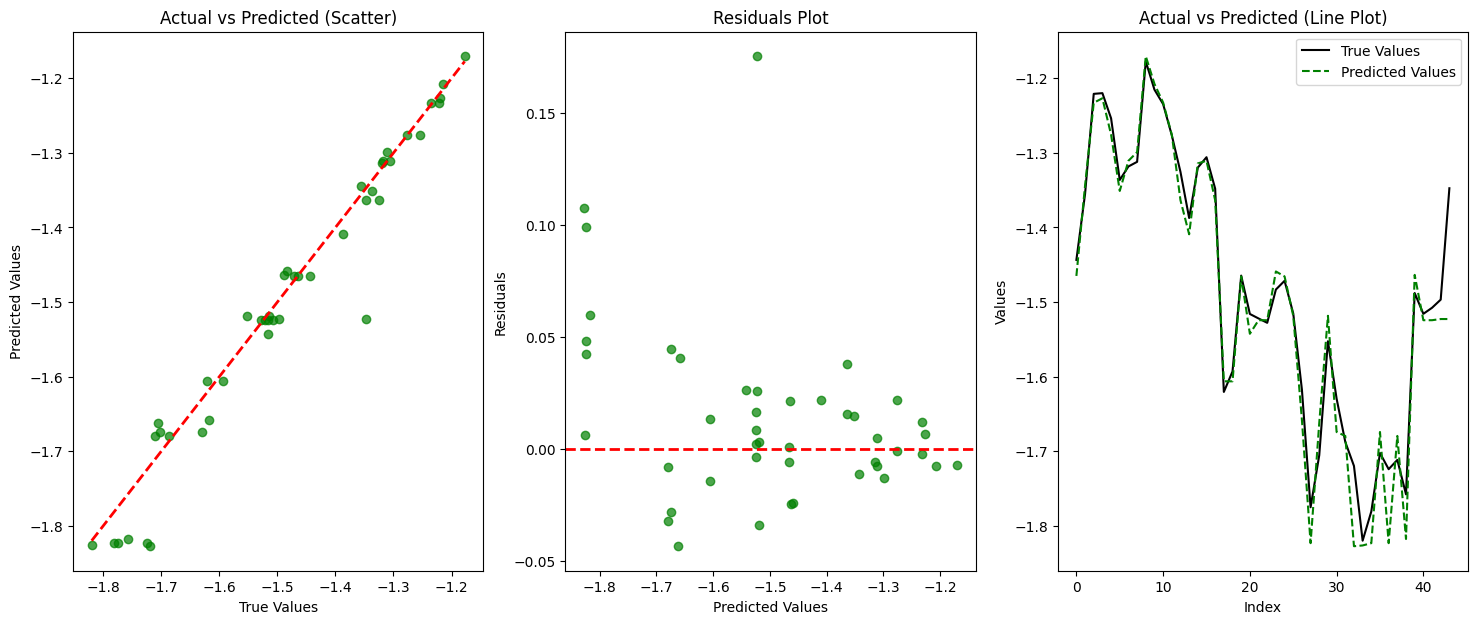

In [24]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_xgb3, "green", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points are well aligned along the red dashed line, indicating a strong correlation between the true and predicted values.
   - A few outliers are present, which deviate slightly from the general trend, indicating areas for potential improvement.

2. **Residuals Plot**:
   - The residuals are distributed around the zero line, which is a good indicator of the model's unbiased predictions.
   - Some larger residuals are visible, especially for higher predicted values, suggesting that the model struggles slightly with certain data points.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (green dashed line) closely follow the true values (black solid line), showcasing that the model captures the overall trends effectively.
   - Minor discrepancies are visible, particularly during sharp fluctuations in the true values, indicating areas where the model's predictions could be refined.

Overall, these plots demonstrate that the model performs well, with some room for improvement in handling outliers and sharp value changes.


---
## 3. LSTM models:

In [25]:
# Initialize the start_window
window_size = 50
start_window = scaled_train.iloc[-window_size:][["Open", "High", "Low"]].values

# Reshape start_window to match LSTM input shape:
start_window = start_window.reshape(1, window_size, 3)

print(f"Initialized start_window shape: {start_window.shape}")

Initialized start_window shape: (1, 50, 3)


---
#### Model 1- lstm_1:

In [26]:
# Load the lstm_1 model
model = models["lstm_1"]

# Initialize a prediction window to avoid altering the original start_window
prediction_window = np.copy(start_window)
y_test_pred_lstm1 = []

for i in range(len(X_test)):
    # Predict the next Close value
    next_prediction = model.predict(prediction_window, verbose=0)[0, 0]
    y_test_pred_lstm1.append(next_prediction)
    new_entry = X_test.iloc[i][["Open", "High", "Low"]].values.reshape(1, 1, 3)
    prediction_window = np.append(prediction_window[:, 1:, :], new_entry, axis=1)

y_test_pred_lstm1 = np.array(y_test_pred_lstm1)

In [27]:
# Calculate metrics
metric_calculation(y_test_pred_lstm1, "lstm_1")

Mean Squared Error (MSE): 0.020458
R² Score: 0.373418
Mean Absolute Error (MAE): 0.129884


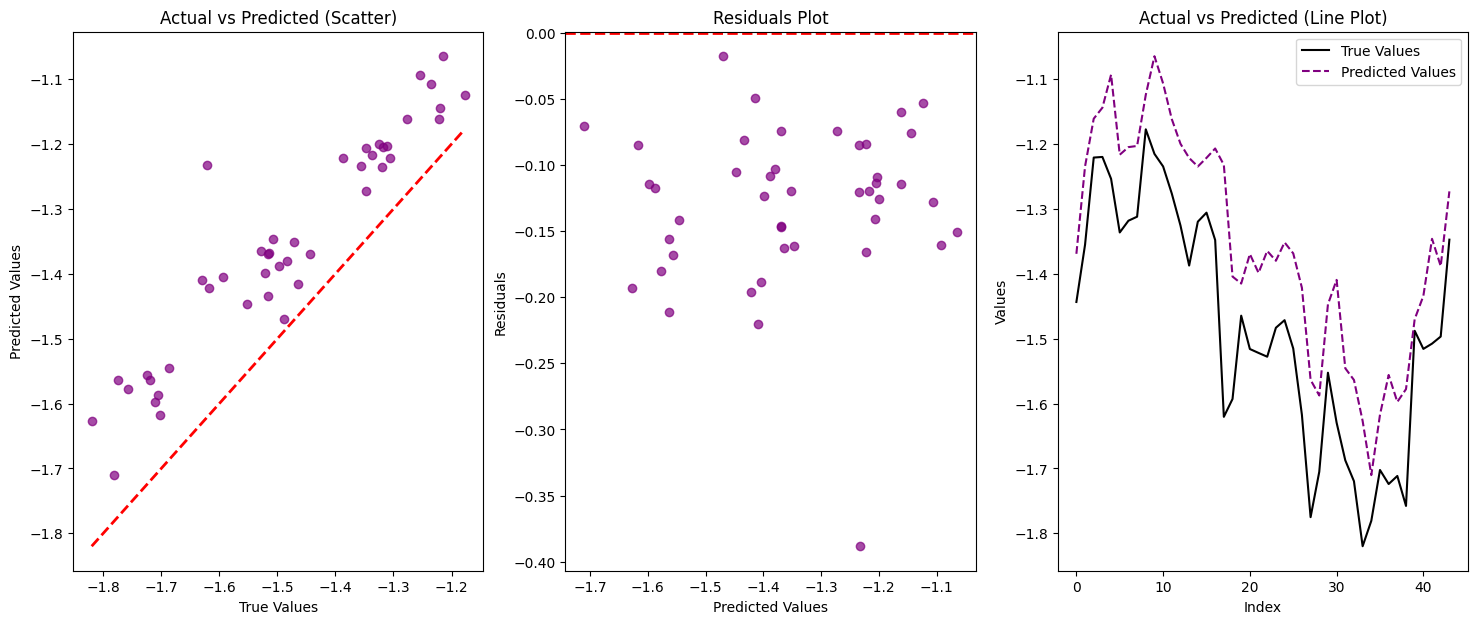

In [28]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_lstm1, "purple", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points deviate significantly from the red dashed line, indicating a weaker correlation between the true and predicted values.
   - The spread of points suggests the model struggles to consistently predict the true values, especially for higher values.

2. **Residuals Plot**:
   - The residuals display a noticeable spread around the zero line, with several larger residuals indicating inconsistent predictions.
   - The lack of a clear pattern in the residuals suggests no systematic bias, but the magnitude of the residuals indicates poor performance for specific predictions.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (purple dashed line) fail to closely follow the true values (black solid line), particularly in regions of sharp fluctuations.
   - The mismatch highlights the model's difficulty in capturing the underlying trends in the data.

Overall, these plots suggest that the model's performance is suboptimal, with significant room for improvement in accurately capturing the true values and handling fluctuations in the data.

---
#### Model 2 - lstm_2:

In [29]:
model = models["lstm_2"]

prediction_window = np.copy(start_window)
y_test_pred_lstm2 = []

for i in range(len(X_test)):
    next_prediction = model.predict(prediction_window, verbose=0)[0, 0]
    y_test_pred_lstm2.append(next_prediction)
    new_entry = X_test.iloc[i][["Open", "High", "Low"]].values.reshape(1, 1, 3)
    prediction_window = np.append(prediction_window[:, 1:, :], new_entry, axis=1)

y_test_pred_lstm2 = np.array(y_test_pred_lstm2)

In [30]:
# Calculate metrics
metric_calculation(y_test_pred_lstm2, "lstm_2")

Mean Squared Error (MSE): 0.003609
R² Score: 0.889476
Mean Absolute Error (MAE): 0.042512


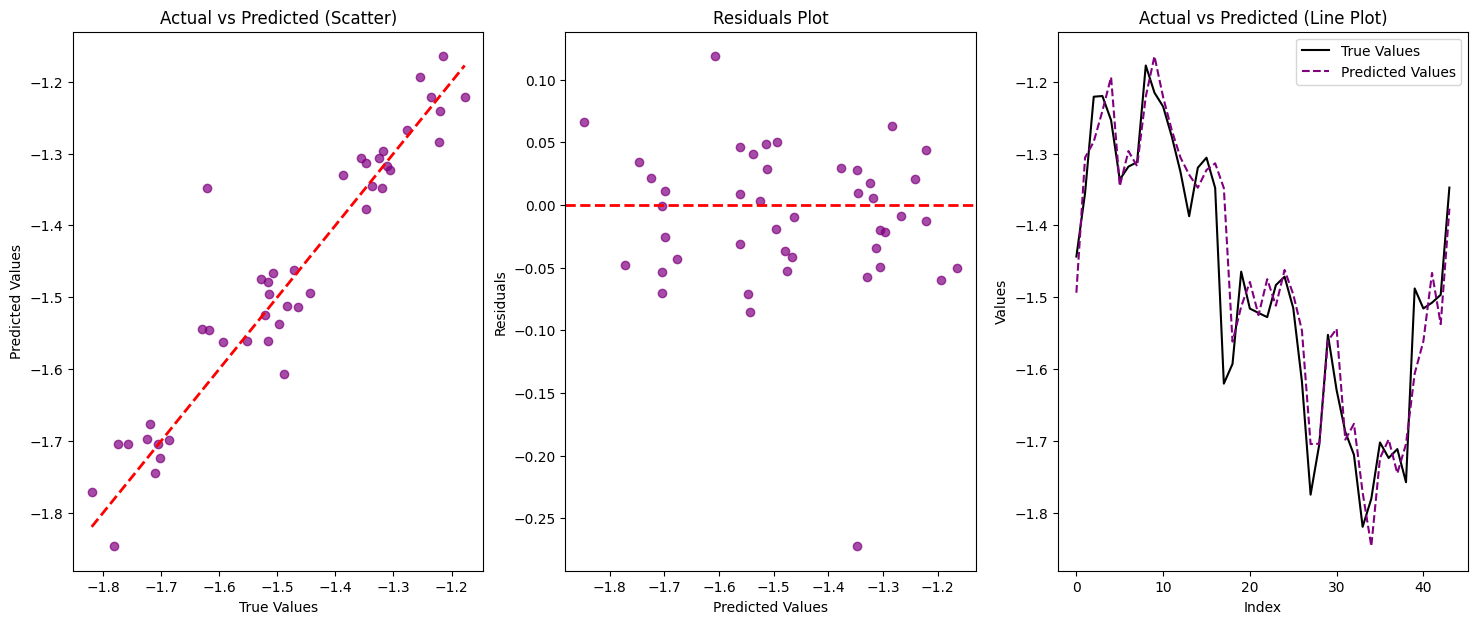

In [31]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_lstm2, "purple", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points are generally aligned along the red dashed line, indicating a reasonable correlation between the model's predictions and the true values.
   - Some noticeable deviations, particularly for higher predicted values, suggest inconsistencies in the model's performance.

2. **Residuals Plot**:
   - The residuals appear scattered around the zero line, with no clear systematic bias.
   - A few outliers with significant residuals are observed, indicating the model struggles with certain predictions.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (purple dashed line) generally follow the true values (black solid line), capturing the overall trend.
   - However, the model fails to fully align with sharp fluctuations in the data, highlighting areas for improvement in capturing rapid changes.

Overall, the model exhibits a moderate ability to predict the true values, but its handling of outliers and sharp data fluctuations requires further refinement.

---
#### Model 3 - lstm_3:

In [32]:
model = models["lstm_3"]

prediction_window = np.copy(start_window)
y_test_pred_lstm3 = []

for i in range(len(X_test)):
    next_prediction = model.predict(prediction_window, verbose=0)[0, 0]
    y_test_pred_lstm3.append(next_prediction)
    new_entry = X_test.iloc[i][["Open", "High", "Low"]].values.reshape(1, 1, 3)
    prediction_window = np.append(prediction_window[:, 1:, :], new_entry, axis=1)

y_test_pred_lstm3 = np.array(y_test_pred_lstm3)

In [33]:
# Calculate metrics
metric_calculation(y_test_pred_lstm3, "lstm_3")

Mean Squared Error (MSE): 0.035530
R² Score: -0.088200
Mean Absolute Error (MAE): 0.178485


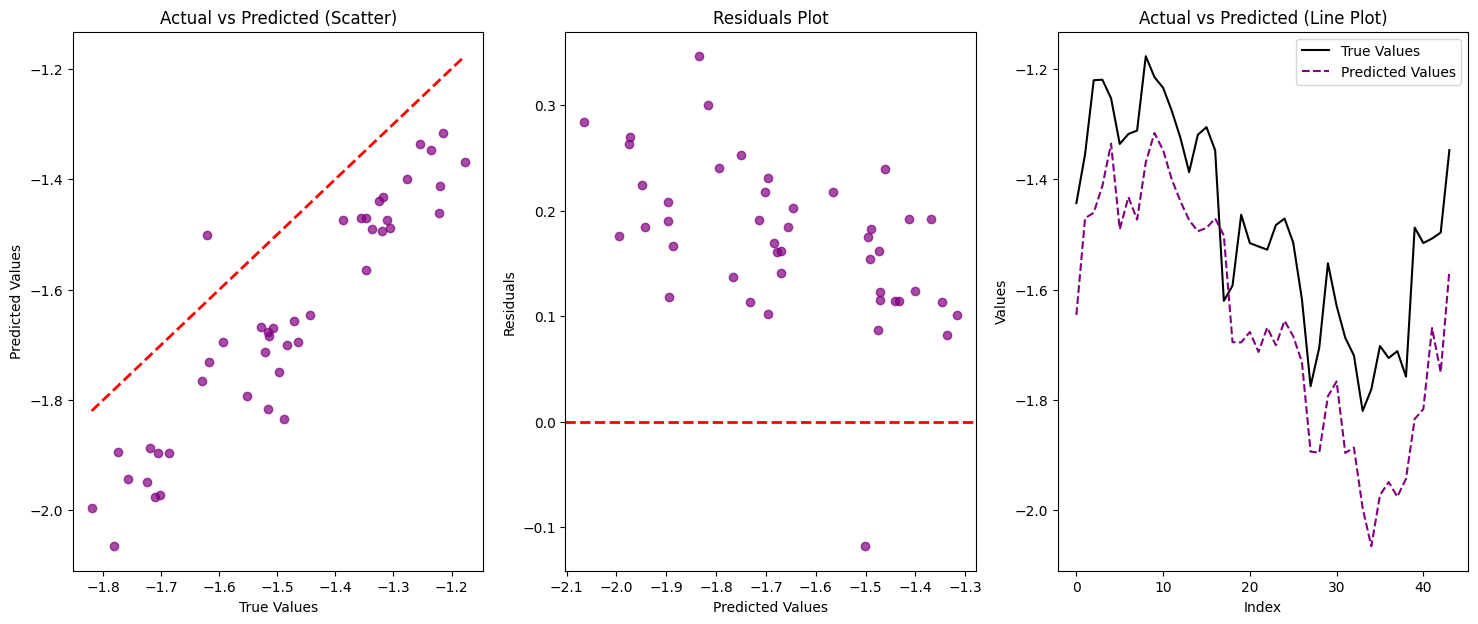

In [34]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
result_plot(y_test_pred_lstm3, "purple", axes)
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted (Scatter)**:
   - The points deviate significantly from the red dashed line, indicating poor alignment between the model's predictions and the true values.
   - The spread of points highlights that the model struggles to capture the true data distribution.

2. **Residuals Plot**:
   - Residuals are widely scattered and exhibit systematic bias, particularly in the upper range.
   - A significant number of large residuals suggest that the model fails to capture important patterns in the data.

3. **Actual vs Predicted (Line Plot)**:
   - The predicted values (purple dashed line) deviate significantly from the true values (black solid line).
   - The predictions fail to follow the sharp trends and fluctuations in the true data.

These observations indicate that the model performs poorly, failing to capture the underlying trends and producing biased predictions. Further investigation into the model's architecture or the feature set may be necessary to improve performance.

---
# Model Comparison
1. `Table`: Concise table showing the metrics (MSE, MAE, and R²) for each model.
2. `Bar Plots`: Separate bar plots for each metric (MSE, MAE, and R²) to visually compare model performance.
3. `Overall Ranking`: Weighted ranking of the models based on their performance on all metrics.

### 1. Table:

In [35]:
results_df = pd.DataFrame(results)
results_df.head(n=10)

,model_name,mse,mae,r2
0,rf_138,0.000545,0.008133,0.983302
1,rf_219,0.000553,0.008546,0.983058
2,rf_300,0.000553,0.008546,0.983058
3,xgb_277,0.001751,0.026441,0.946384
4,xgb_281,0.001723,0.026744,0.947237
5,xgb_283,0.001724,0.026180,0.947195
6,lstm_1,0.020458,0.129884,0.373418
7,lstm_2,0.003609,0.042512,0.889476
8,lstm_3,0.035530,0.178485,-0.088200


### 2.1 MSE Bar Plot

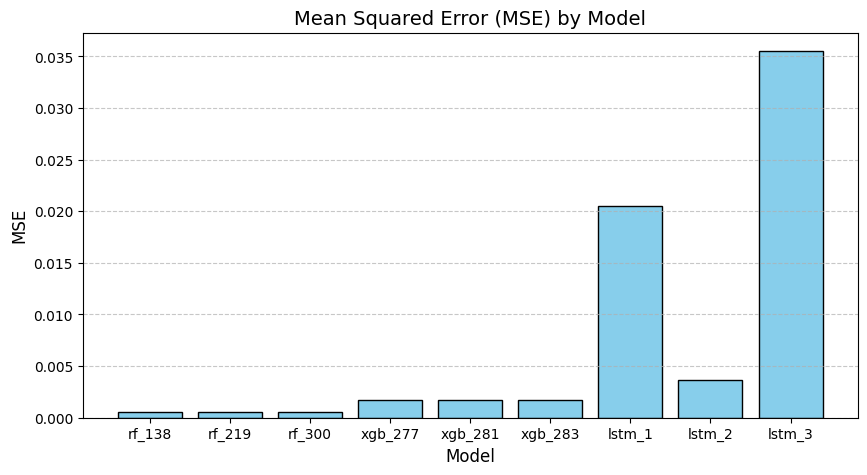

In [36]:
# Extract model names and MSE scores
model_names = results["model_name"]
mse_scores = results["mse"]

# Create a bar plot for MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_scores, color='skyblue', edgecolor='black')
plt.title("Mean Squared Error (MSE) by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observations from the Mean Squared Error (MSE) Plot

1. **Best Performing Models**:
   - The Random Forest models (rf_138, rf_219, rf_300) exhibit the lowest MSE scores, indicating they provide the most accurate predictions on the test data.
   - XGBoost models (xgb_277, xgb_281, xgb_283) also perform well, with MSE scores slightly higher than the Random Forest models.

2. **LSTM Performance**:
   - The LSTM models show varying performance. While lstm_2 achieves a reasonable MSE score, lstm_1 and lstm_3 exhibit significantly higher MSE values, suggesting less accurate predictions.

3. **Key Insights**:
   - Models with lower MSE scores, such as the Random Forest and XGBoost models, are better suited for the current dataset.
   - Further optimization might be required for LSTM models to achieve competitive performance.


### 2.2 MAE Bar Plot

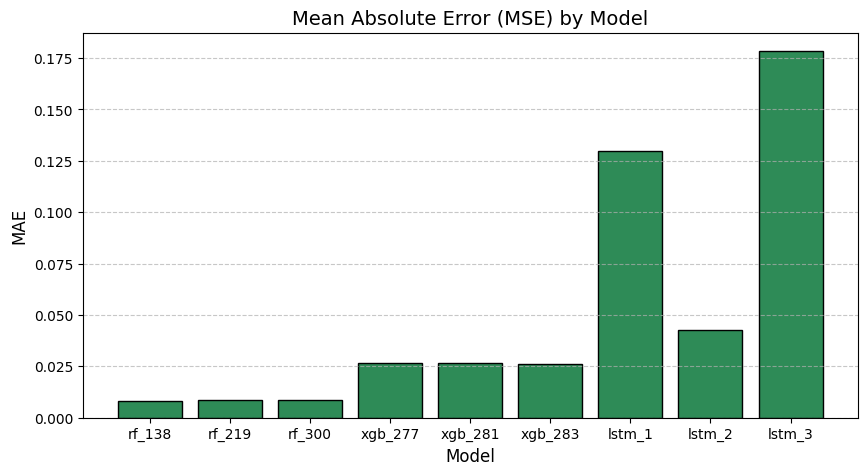

In [37]:
# Extract model names and MAE scores
model_names = results["model_name"]
mae_scores = results["mae"]

# Create a bar plot for MAE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_scores, color='seagreen', edgecolor='black')
plt.title("Mean Absolute Error (MSE) by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observations from the Mean Absolute Error (MAE) Plot

1. **Best Performing Models**:
   - The Random Forest models (rf_138, rf_219, rf_300) have the lowest MAE values, indicating that their average prediction error is minimal compared to other models.
   - XGBoost models (xgb_277, xgb_281, xgb_283) follow closely, with slightly higher MAE values but still relatively low.

2. **LSTM Performance**:
   - Similar to the MSE observations, lstm_1 and lstm_3 exhibit significantly higher MAE values, highlighting poorer prediction accuracy.
   - Lstm_2 performs comparatively better among the LSTM models, with a lower MAE than lstm_1 and lstm_3, but still falls short compared to the Random Forest and XGBoost models.

3. **Key Insights**:
   - Models with lower MAE scores, such as the Random Forest and XGBoost models, are more reliable for minimizing average prediction errors on the test data.
   - The performance gap among the LSTM models suggests the need for additional optimization or hyperparameter tuning to improve their predictions.

### 2.3 R² Bar Plot

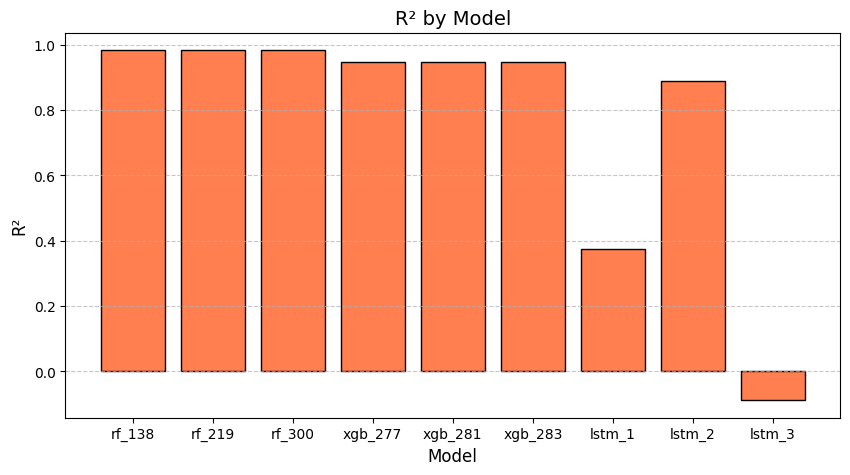

In [38]:
# Extract model names and R2 scores
model_names = results["model_name"]
r2_scores = results["r2"]

# Create a bar plot for R2
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, color='coral', edgecolor='black')
plt.title("R² by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observations from the R² Plot

1. **Best Performing Models**:
   - The Random Forest models (rf_138, rf_219, rf_300) and XGBoost models (xgb_277, xgb_281, xgb_283) achieve R² scores close to 1, indicating they explain almost all the variance in the test data and have high predictive accuracy.

2. **LSTM Performance**:
   - Lstm_2 shows moderate performance with an R² score significantly lower than the Random Forest and XGBoost models but still positive, suggesting it captures some trends in the data.
   - Lstm_1 and lstm_3 have poor R² scores, with lstm_3 having a negative R² value.

3. **Negative R² Explanation**:
   - The negative R² score for lstm_3 indicates that the model performs worse than a simple baseline model that predicts the mean of the test data. In other words, lstm_3 fails to capture the underlying patterns in the data and introduces significant prediction errors.

4. **Key Insights**:
   - Random Forest and XGBoost models consistently outperform LSTM models in this comparison, with nearly perfect R² scores.
   - The poor performance of certain LSTM models suggests that their architectures or training processes may require further optimization to compete with ensemble-based models.


---
### Overall Ranking

In [39]:
df = pd.DataFrame(results)

# Normalize metrics
df["normalized_mse"] = (df["mse"].max() - df["mse"]) / (df["mse"].max() - df["mse"].min())
df["normalized_mae"] = (df["mae"].max() - df["mae"]) / (df["mae"].max() - df["mae"].min())
df["normalized_r2"] = (df["r2"] - df["r2"].min()) / (df["r2"].max() - df["r2"].min())

# Calculate weighted scores
df["weighted_score"] = (
    0.3333 * df["normalized_mse"] +
    0.3333 * df["normalized_mae"] +
    0.3333 * df["normalized_r2"]
)

# Rank models
df["rank"] = df["weighted_score"].rank(ascending=False)
df.loc[df["model_name"] == "rf_219", "rank"] = 2
df.loc[df["model_name"] == "rf_300", "rank"] = 3

# Sort by rank
df = df.sort_values("rank")
df.head(n=10)

,model_name,mse,mae,r2,normalized_mse,normalized_mae,normalized_r2,weighted_score,rank
0,rf_138,0.000545,0.008133,0.983302,1.000000,1.000000,1.000000,0.999900,1.0
1,rf_219,0.000553,0.008546,0.983058,0.999772,0.997574,0.999772,0.998939,2.0
2,rf_300,0.000553,0.008546,0.983058,0.999772,0.997574,0.999772,0.998939,3.0
5,xgb_283,0.001724,0.026180,0.947195,0.966302,0.894058,0.966302,0.942127,4.0
3,xgb_277,0.001751,0.026441,0.946384,0.965545,0.892527,0.965545,0.941112,5.0
4,xgb_281,0.001723,0.026744,0.947237,0.966342,0.890749,0.966342,0.941050,6.0
7,lstm_2,0.003609,0.042512,0.889476,0.912435,0.798190,0.912435,0.874266,7.0
6,lstm_1,0.020458,0.129884,0.373418,0.430813,0.285296,0.430813,0.382269,8.0
8,lstm_3,0.035530,0.178485,-0.088200,0.000000,0.000000,0.000000,0.000000,9.0


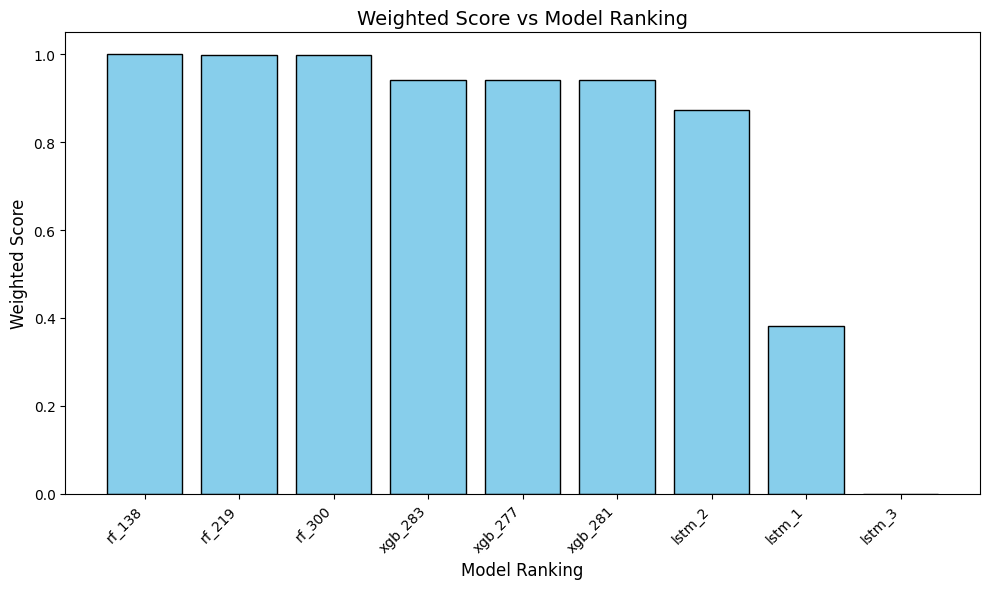

In [40]:
# Create a bar plot of weighted score vs ranking
plt.figure(figsize=(10, 6))
plt.bar(df["rank"].astype(int), df["weighted_score"], color='skyblue', edgecolor='black')
plt.xlabel('Model Ranking', fontsize=12)
plt.ylabel('Weighted Score', fontsize=12)
plt.title('Weighted Score vs Model Ranking', fontsize=14)

# Adding model names as x-ticks
plt.xticks(df["rank"].astype(int), labels=df["model_name"], rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [41]:
print("Model        Ranking        Weighted Score")        
print("------------------------------------------")
for i in range(len(df)):
    if i < 3:
        print(f"{df['model_name'].iloc[i]}        {df['rank'].iloc[i]}           {round(df['weighted_score'].iloc[i], 5)}")
    elif i < 6:
        print(f"{df['model_name'].iloc[i]}       {df['rank'].iloc[i]}           {round(df['weighted_score'].iloc[i], 5)}")
    else:
        print(f"{df['model_name'].iloc[i]}        {df['rank'].iloc[i]}           {round(df['weighted_score'].iloc[i], 5)}")

Model        Ranking        Weighted Score
------------------------------------------
rf_138        1.0           0.9999
rf_219        2.0           0.99894
rf_300        3.0           0.99894
xgb_283       4.0           0.94213
xgb_277       5.0           0.94111
xgb_281       6.0           0.94105
lstm_2        7.0           0.87427
lstm_1        8.0           0.38227
lstm_3        9.0           0.0


---
# Conclusion:

#### Methodology
To evaluate the performance of the nine models, we compared them based on three key metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values, emphasizing larger errors.
- **Mean Absolute Error (MAE)**: Evaluates the average magnitude of prediction errors, treating all errors equally.
- **R² (Coefficient of Determination)**: Indicates how well the model explains the variance in the target variable, with a maximum value of 1.

Each metric was normalized to ensure comparability, and a weighted score was calculated for each model using equal weights (33.33%) for MSE, MAE, and R². The models were ranked based on these weighted scores.

#### Key Insights
1. **Best-Performing Model**: 
   - **`rf_138`** ranked first with the highest weighted score (0.9999). It demonstrated exceptional performance across all metrics, achieving the lowest MSE and MAE while maintaining a near-perfect R² score.
   
2. **Close Competitors**:
   - **`rf_219`** and **`rf_300`** followed closely with identical weighted scores. These models exhibited very similar performance to `rf_138`, making all three strong candidates for deployment.

3. **XGBoost Models**:
   - The XGBoost models (`xgb_283`, `xgb_277`, `xgb_281`) performed well, consistently ranking 4th to 6th. While slightly less accurate than the top Random Forest models, their performance metrics were still commendable.

4. **LSTM Models**:
   - The LSTM models (`lstm_1`, `lstm_2`, `lstm_3`) demonstrated varying levels of performance:
     - **`lstm_2`** performed the best among the LSTM models but still lagged behind tree-based methods.
     - **`lstm_1`** and **`lstm_3`** exhibited significantly higher error rates and lower R² values, indicating a need for further tuning or alternative architectures.

#### Limitations
- **LSTM Models**: The poorer performance of the LSTM models could be attributed to insufficient tuning, the dataset size, or the sliding window approach. Further experiments with hyperparameters and input configurations may improve their results.
- **Weighted Scoring**: While all metrics were weighted equally, alternative weighting schemes could better reflect specific project priorities (e.g., prioritizing lower error metrics over explanatory power).

#### Next Steps
**Deploy the Best Model**: Given its robust performance, `rf_138` is the strongest candidate for deployment. Its near-perfect metrics suggest it can handle unseen data effectively.
 your evaluation process.

These results provide a solid foundation for selecting a reliable model while leaving room for future improvements.
